In [1]:
from _utils import *

import pickle
import numpy as np
import pandas as pd

def generate_param_pickle(
        save_file,
        save_folder,
        monomers=5000,
        replicates=6,
        lef_lifetime=10,
        lef_separation=20,
        ctcf_sites=None,
        ctcf_capture=0.5,
        ctcf_release=0.003,
        ctcf_dir=None,
        monomer_types=None,
        interaction_matrix=None,
        trajectory_length=1000,
        density=0.2,
        load_prob=1/5000,
        gpu_id="0",
        repulsion=6,
        lef_flag=True
    ):
    
    if ctcf_sites is None:
        ctcf_sites = np.arange(0, monomers, 5)
    
    ctcf_capture = np.ones_like(ctcf_sites) * ctcf_capture
    ctcf_release = np.ones_like(ctcf_sites) * ctcf_release
    load_prob = np.ones(monomers) * load_prob
    
    if ctcf_dir is None:
        ctcf_dir = np.ones_like(ctcf_sites) * 0
        
    if monomer_types is None:
        monomer_types = np.zeros(monomers, dtype=int)
        
    if interaction_matrix is None:
        interaction_matrix = np.array([[0, 0], [0, 0]])

    param_dict = {
        'monomers': monomers,
        'replicates': replicates,
        'lef_lifetime': lef_lifetime,
        'lef_separation': lef_separation,
        'ctcf_capture': ctcf_capture,
        'ctcf_release': ctcf_release,
        'save_folder': save_folder,
        'ctcf_dir': ctcf_dir,
        'ctcf_sites': ctcf_sites,
        'monomer_types': monomer_types,
        'interaction_matrix': interaction_matrix,
        'trajectory_length': trajectory_length,
        'density': density,
        'load_prob': load_prob,
        'gpu_id': gpu_id,
        'repulsion': repulsion,
        'lef_flag': True
    }
    
    with open(save_file, 'wb') as f:
        pickle.dump(param_dict, f)
    
    # change the file suffix to csv 
    save_file = save_file.split('.')
    save_file[-1] = 'csv'
    save_file = '.'.join(save_file)
    
    # save the parameters as a csv file
    # write it line by line
    with open(save_file, 'w') as f:
        for key, value in param_dict.items():
            if isinstance(value, np.ndarray):
                value = ','.join(map(str, value))
            f.write(f'{key},{value}\n')
            

save_dir = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params'
sim_save_dir = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_results'
    

2024-10-28 17:32:15.886236: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 17:32:15.916943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI AVX512_BF16, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Max CTCF sites: 80.0
11 11 11
Max CTCF sites: 160.0
16 16 16
Max CTCF sites: 240.0
21 21 21
Max CTCF sites: 320.0
26 26 26
Max CTCF sites: 400.0
31 31 31
Max CTCF sites: 480.0
36 36 36
Max CTCF sites: 560.0
41 41 41
Max CTCF sites: 640.0
46 46 46
Max CTCF sites: 720.0
51 51 51
Max CTCF sites: 800.0
56 56 56
Max CTCF sites: 880.0
61 61 61
Max CTCF sites: 960.0
66 66 66
Max CTCF sites: 1040.0
71 71 71
Max CTCF sites: 1120.0
76 76 76
Max CTCF sites: 1200.0
81 81 81
Max CTCF sites: 1280.0
86 86 86
Max CTCF sites: 1360.0
91 91 91
Max CTCF sites: 1440.0
96 96 96
Max CTCF sites: 1520.0
101 101 101
Max CTCF sites: 1600.0
106 106 106
Max CTCF sites: 1680.0
111 111 111
Max CTCF sites: 1760.0
116 116 116
Max CTCF sites: 1840.0
121 121 121
Max CTCF sites: 1920.0
126 126 126
Max CTCF sites: 2000.0
131 131 131
Max CTCF sites: 2080.0
136 136 136
Max CTCF sites: 2160.0
141 141 141
Max CTCF sites: 2240.0
146 146 146
Max CTCF sites: 2320.0
151 151 151
Max CTCF sites: 2400.0
156 156 156
Max CTCF sites: 2

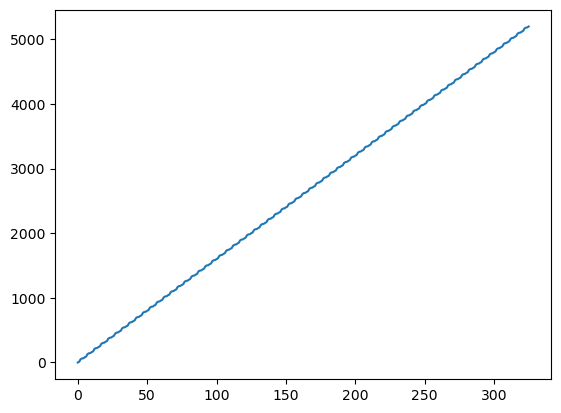

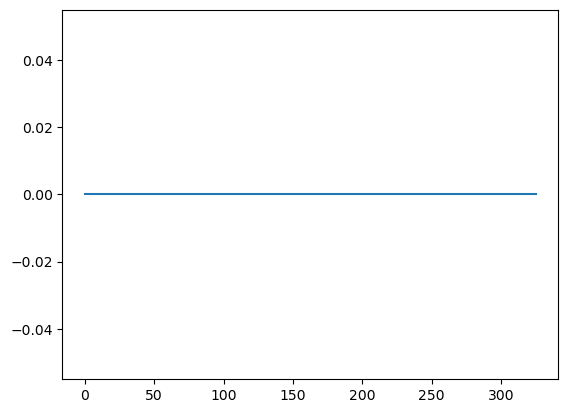

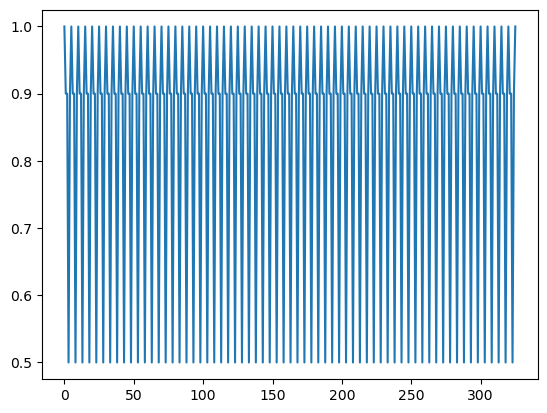

In [2]:
ctcf_sites_one_iter = np.array([0, 11, 49, 62, 65, 80])
ctcf_capture_one_iter = np.array([1, 0.9, 0.9, 0.5, 0.9, 1])
ctcf_dir_one_iter = np.array([0, 0, 0, 0, 0, 0])

monomers = int(ctcf_sites_one_iter.max())*65

ctcf_sites = np.append(np.zeros([0]), ctcf_sites_one_iter)
ctcf_capture = np.append(np.zeros([0]), ctcf_capture_one_iter)
ctcf_dir = np.append(np.zeros([0]), ctcf_dir_one_iter)

while np.max(ctcf_sites) < monomers:
    print('Max CTCF sites:', np.max(ctcf_sites))
    ctcf_sites_next = np.max(ctcf_sites) + ctcf_sites_one_iter 
    
    ctcf_sites = np.append(ctcf_sites, ctcf_sites_next[1:])
    ctcf_capture = np.append(ctcf_capture, ctcf_capture_one_iter[1:])
    ctcf_dir = np.append(ctcf_dir, ctcf_dir_one_iter[1:])
    
    print(len(ctcf_sites), len(ctcf_dir), len(ctcf_capture))
    
ctcf_sites = ctcf_sites.astype(int)[:monomers]
ctcf_capture = ctcf_capture[:monomers]
ctcf_dir = ctcf_dir[:monomers]

plt.plot(ctcf_sites)
plt.show()
plt.plot(ctcf_dir)
plt.show()

plt.plot(ctcf_capture)

In [3]:
lef_lifetimes = [5, 10, 20, 40, 80]
lef_separations = [2, 5, 10, 20, 40]

In [5]:
for lf in lef_lifetimes:
    for ls in lef_separations:
        save_file = f'{save_dir}/20241028_Sox9_EmpiricalCTCF_Lifetime{lf}_Sepaation{ls}.pkl'
        save_folder = f'{sim_save_dir}/20241028_Sox9_EmpiricalCTCF_Lifetime{lf}_Sepaation{ls}/'
        
        generate_param_pickle(
            save_file=save_file,
            save_folder=save_folder,
            monomers=monomers,
            lef_lifetime=lf,
            lef_separation=ls,
            ctcf_sites=ctcf_sites,
            ctcf_capture=ctcf_capture,
            ctcf_dir=ctcf_dir,
            load_prob=1/monomers,
            trajectory_length = 1000 * 10 
        )
        
        print(f'Generated {save_file}')

Generated /mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params/20241028_Sox9_EmpiricalCTCF_Lifetime5_Sepaation2.pkl
Generated /mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params/20241028_Sox9_EmpiricalCTCF_Lifetime5_Sepaation5.pkl
Generated /mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params/20241028_Sox9_EmpiricalCTCF_Lifetime5_Sepaation10.pkl
Generated /mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params/20241028_Sox9_EmpiricalCTCF_Lifetime5_Sepaation20.pkl
Generated /mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params/20241028_Sox9_EmpiricalCTCF_Lifetime5_Sepaation40.pkl
Generated /mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params/20241028_Sox9_EmpiricalCTCF_Lifetime10_Sepaation2.pkl
Generated /mnt/hom

In [6]:
# Run sbatch script
slurm_path = '/mnt/home/tudomlumleart/ceph/12_LoopQuantification/scripts/slurm/2024_RunPythonScriptOpenMM.sh'
python_path = '/mnt/home/tudomlumleart/ceph/12_LoopQuantification/scripts/polymer_simulation.py'
params_path = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params'

# Find file in params that start with 20241010 and ends with .pkl
import glob
import os

matching_files = glob.glob(f'{params_path}/20241028*.pkl')

# Iterate through all matching files 
for file in matching_files:
    print(file)
    # run sbatch script
    os.system(f'sbatch {slurm_path} {python_path} {file}')


/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params/20241028_Sox9_EmpiricalCTCF_Lifetime80_Sepaation40.pkl
Submitted batch job 4097827
/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params/20241028_Sox9_EmpiricalCTCF_Lifetime5_Sepaation2.pkl
Submitted batch job 4097828
/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params/20241028_Sox9_EmpiricalCTCF_Lifetime40_Sepaation20.pkl
Submitted batch job 4097829
/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params/20241028_Sox9_EmpiricalCTCF_Lifetime20_Sepaation40.pkl
Submitted batch job 4097830
/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_params/20241028_Sox9_EmpiricalCTCF_Lifetime20_Sepaation20.pkl
Submitted batch job 4097831
/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refineme